# Model: Decision Tree

### Importing Libraries

In [7]:
import _pickle as pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Importing the model
from sklearn.tree import DecisionTreeClassifier

### Loading in Data

In [2]:
df = pd.read_excel('../top10_corr_features.xlsx')
df = df.drop(df.columns[0], axis = 1)


### Scaling the Data

In [3]:
scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Splitting the Data

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Helper Functions

#### Function for plotting confusion matrix

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Modeling
The preferred evaluation metric used will be __Precision__ for each class.  They will be optimized using the __F1 Score-Macro-Average__ to balance the Precision and Recall.  This is done because we want to not only be correct when predicting but also make a decent amount of predictions for each class.  Classes such as 'Buy' and 'Sell' are more important than 'Hold'.

### Fitting and Training

In [8]:
# Fitting and training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Printing out Evaluation Metrics

In [9]:
# Classifier predictions
pred = clf.predict(X_test)

#Printing out results
report = classification_report(y_test, pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.50      0.25      0.33         8
         Buy       0.40      0.80      0.53         5
        Hold       0.33      0.25      0.29         4

    accuracy                           0.41        17
   macro avg       0.41      0.43      0.38        17
weighted avg       0.43      0.41      0.38        17



### Confusion Matrix

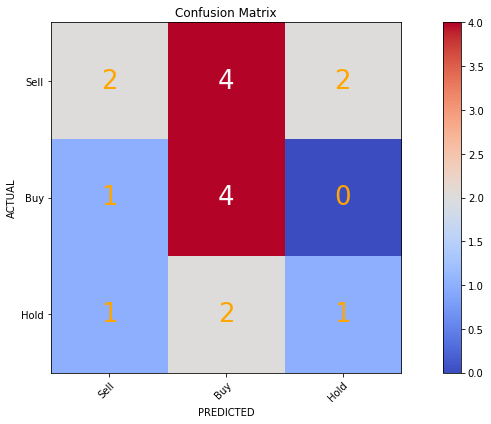

In [10]:
plot_confusion_matrix(y_test, pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

## Tuning Model Parameters

In [11]:
from sklearn.model_selection import GridSearchCV

### Parameters

In [12]:
# Parameters to Tune
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [None, 2, 3, 4, 5, 6],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1,2,3,4,5,6]}

In [13]:
search = GridSearchCV(clf, params, cv=3, return_train_score=True, verbose=5, scoring='f1_macro')

search.fit(X,y)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=(train=1.000, test=0.327), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=(train=1.000, test=0.336), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, score=(train=1.000, test=0.199), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, score=(train=0.890, test=0.233), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=(train=0.803, test=0.219), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, score=(train=0.881, test=0.307), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, score=(train=0.909, test=0.300), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, score=(train=0.839, test=0.286), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, score=(train=0.850, test

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, score=(train=0.832, test=0.329), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, score=(train=0.765, test=0.302), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=5, score=(train=0.773, test=0.104), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, score=(train=0.761, test=0.236), total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=3, min_samples_split=10, score=(train=0.672, te

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, score=(train=0.706, test=0.333), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, score=(train=0.640, test=0.337), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=10, score=(train=0.422, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=(train=0.706, test=0.367), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2, score=(train=0.640, test=0.337), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=2 
[CV] 

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV] criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=(train=0.422, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=(train=0.706, test=0.367), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=(train=0.640, test=0.337), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=(train=0.422, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=4, min_samples_split=5, score=(train=0.706, test=0.367), total=   0.0s
[CV] cri

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2, score=(train=0.640, test=0.337), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=2, score=(train=0.422, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=(train=0.640, test=0.337), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=5, score=(train=0.422, test=0.158), total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  cri

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, score=(train=0.691, test=0.316), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, score=(train=0.706, test=0.333), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, score=(train=0.722, test=0.211), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, score=(train=0.673, test=0.263), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=10, score=(train=0.706, test=0.367), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=10 
[CV]  c

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=(train=0.731, test=0.263), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5, score=(train=0.699, test=0.139), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, score=(train=0.706, test=0.367), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=10, score=(train=0.699, test=0.139), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio


[CV]  criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=2, score=(train=0.699, test=0.139), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=(train=0.699, test=0.139), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=10, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, score=(train=0.761, test=0.263), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=10, score=(train=0.713, test=0.134), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=(train=0.812, test=0.329), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2, score=(train=0.766, test=0.263), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=2 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=2, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=2, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=2 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=2, score=(train=0.713, test=0.134), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=6, min_samples_split=5 
[CV]  crit

[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=5, score=(train=0.751, test=0.174), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=(train=0.758, test=0.190), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=(train=0.751, test=0.174), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2, score=(train=0.480, test=0.170), total=   0.0s
[CV] criterion=gini, max_depth=5, min_samples_leaf=6, min_samples_split=2 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio


[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, score=(train=1.000, test=0.262), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=2, score=(train=0.982, test=0.198), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, score=(train=0.890, test=0.261), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, score=(train=0.867, test=0.275), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=1, min_samples_split=5, score=(train=0.918, test=0.199), total=   0.0s
[CV] crit

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=5, score=(train=0.773, test=0.104), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, score=(train=0.761, test=0.236), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, score=(train=0.672, test=0.419), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=3, min_samples_split=10, score=(train=0.750, test=0.104), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2, score=(train=0.812, test=0.329), total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=4, min_samples_split=2 
[CV]

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio


[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=(train=0.822, test=0.222), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=(train=0.746, test=0.263), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=10, score=(train=0.665, test=0.351), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2, score=(train=0.892, test=0.359), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=5, score=(train=0.852, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, score=(train=0.781, test=0.217), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, score=(train=0.691, test=0.285), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=3, min_samples_split=10, score=(train=0.665, test=0.315), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, score=(train=0.477, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=2, score=(train=0.679, test=0.307), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, score=(train=0.763, test=0.217), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, score=(train=0.477, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, score=(train=0.679, test=0.307), total=   0.0s
[CV] criterion=entropy, max_dep

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=(train=0.498, test=0.250), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=(train=0.550, test=0.357), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, score=(train=0.461, test=0.375), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, score=(train=0.498, test=0.250), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=5, score=(train=0.550, test=0.357), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, m

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=5, score=(train=0.461, test=0.375), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=(train=0.498, test=0.250), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=(train=0.550, test=0.341), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=10, score=(train=0.461, test=0.375), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=4, min_samples_split=2, score=(train=0.498, test=0.221), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_lea

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=(train=0.461, test=0.268), total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=6, min_samples_split=10, score=(train=0.465, test=0.359), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=(train=0.799, test=0.173), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=(train=0.709, test=0.380), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, score=(train=0.650, test=0.315), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=1

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV]  criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=(train=0.461, test=0.268), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=5, score=(train=0.465, test=0.359), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10, score=(train=0.722, test=0.173), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10, score=(train=0.461, test=0.268), total=   0.0s
[CV] criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10 
[CV]  criterion=entropy, max_depth=3, min_samples_leaf=6, min_samples_split=10, score=(train=0.465, test=0.359), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_lea

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=(train=0.718, test=0.256), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, score=(train=0.859, test=0.356), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=(train=0.731, test=0.237), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=(train=0.718, test=0.256), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=5, score=(train=0.859, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=2, m

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, score=(train=0.763, test=0.190), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, score=(train=0.477, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=5, score=(train=0.679, test=0.352), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=10, score=(train=0.763, test=0.190), total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=5, min_samples_split=10, score=(train=0.477, tes

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=2, score=(train=0.852, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, score=(train=0.830, test=0.406), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, score=(train=0.825, test=0.270), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=5, score=(train=0.870, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=10, score=(train=0.781, test

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=2, score=(train=0.679, test=0.307), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, score=(train=0.763, test=0.190), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, score=(train=0.477, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, score=(train=0.679, test=0.307), total=   0.0s
[CV] criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=10, score=(train=0.763, test=

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=10, score=(train=0.654, test=0.270), total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=4, min_samples_split=10, score=(train=0.698, test=0.352), total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, score=(train=0.763, test=0.217), total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, score=(train=0.477, test=0.317), total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=2, score=(train=0.679, test=0.307), total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5

C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\72445\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                

### Tuned Results

In [14]:
print("Mean Training Score:", np.mean(search.cv_results_['mean_train_score']))
print("Mean Testing Score:", search.score(X, y))
print("\nBest Parameter Found:")
search.best_params_

Mean Training Score: 0.6992864958741142
Mean Testing Score: 0.7085044283413847

Best Parameter Found:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

### Model with the Best Parameters

In [15]:
search_clf = search.best_estimator_

search_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Results from Optimum Parameters

In [16]:
# Classifier predictions
s_pred = search_clf.predict(X_test)

#Printing out results
report = classification_report(y_test, s_pred, target_names=['Sell', 'Buy', 'Hold'])
print(report)

              precision    recall  f1-score   support

        Sell       0.20      0.12      0.15         8
         Buy       0.30      0.60      0.40         5
        Hold       0.50      0.25      0.33         4

    accuracy                           0.29        17
   macro avg       0.33      0.33      0.30        17
weighted avg       0.30      0.29      0.27        17



### Confusion Matrix for Optimum Parameters

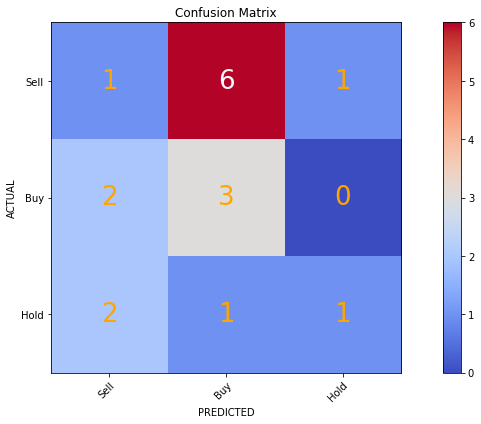

In [17]:
plot_confusion_matrix(y_test, s_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()